In [ ]:
# Importing Packages
import math, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from ipywidgets import interact, interactive
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
import random
from tqdm.notebook import tqdm
from scipy.integrate import odeint

In [ ]:
# Compute the time-derivative of a Lorenz systems
def x_dot(x1, y1, z1,x2, y2, z2, k):
    x1_dot=sigma_1[k]*(y1 - x1)
    x2_dot=sigma*(y2-x2)
    return (x1_dot,x2_dot)

def y_dot(x1, y1, z1, x2, y2, z2, k):
    y1_dot=rho*x1 - y1 - x1*z1
    y2_dot=rho*x1 - y2 - x1*z2
    return(y1_dot,y2_dot)

def z_dot(x1, y1, z1, x2, y2, z2, k):
    z1_dot=-1*(beta*z1) + x1*y1
    z2_dot=-1*(beta*z2) + x1*y2
    return(z1_dot,z2_dot)

In [ ]:
# Original Message
def message():
  frequency = 0.05
  duration = 100
  sampling_rate = 100

  # Create a time vector
  t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
  signal = np.where(np.sin(2 * np.pi * frequency * t) >= 0, 0, 1)
  return signal


In [ ]:
# 4th order Runge Kutta (RK-4) numerical method
def RungeKutta4(a1,b1,c1,a2,b2,c2,n):

    x1 = np.zeros(n)
    y1 = np.zeros(n)
    z1 = np.zeros(n)

    x2 = np.zeros(n)
    y2 = np.zeros(n)
    z2 = np.zeros(n)
    t = np.zeros(n)

    x1[0] = a1
    y1[0] = b1
    z1[0] = c1

    y2[0] = b2
    z2[0] = c2
    t[0] = 0
    dt = 0.01

    #Compute the approximate solution at equally spaced times.
    for k in range (n-1):

        t[k+1] = t[k] + dt

        k1,u1 = x_dot(x1[k], y1[k], z1[k], x2[k], y2[k], z2[k],k)
        l1,v1 = y_dot(x1[k], y1[k], z1[k], x2[k], y2[k], z2[k],k)
        m1,w1 = z_dot(x1[k], y1[k], z1[k], x2[k], y2[k], z2[k],k)

        k2,u2 = x_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt), (x2[k] + 0.5*u1*dt), (y2[k] + 0.5*v1*dt), (z2[k] + 0.5*w1*dt),k)
        l2,v2 = y_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt), (x2[k] + 0.5*u1*dt), (y2[k] + 0.5*v1*dt), (z2[k] + 0.5*w1*dt),k)
        m2,w2 = z_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt), (x2[k] + 0.5*u1*dt), (y2[k] + 0.5*v1*dt), (z2[k] + 0.5*w1*dt),k)

        k3,u3 = x_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt), (x2[k] + 0.5*u2*dt), (y2[k] + 0.5*v2*dt), (z2[k] + 0.5*w2*dt),k)
        l3,v3 = y_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt), (x2[k] + 0.5*u2*dt), (y2[k] + 0.5*v2*dt), (z2[k] + 0.5*w2*dt),k)
        m3,w3 = z_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt), (x2[k] + 0.5*u2*dt), (y2[k] + 0.5*v2*dt), (z2[k] + 0.5*w2*dt),k)

        k4,u4 = x_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt), (x2[k]+ u3*dt), (y2[k] + v3*dt), (z2[k] + w3*dt),k)
        l4,v4 = y_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt), (x2[k]+ u3*dt), (y2[k] + v3*dt), (z2[k] + w3*dt),k)
        m4,w4 = z_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt), (x2[k]+ u3*dt), (y2[k] + v3*dt), (z2[k] + w3*dt),k)

        x1[k+1] = x1[k] + (dt*(k1 + 2*k2 + 2*k3 + k4) / 6)
        y1[k+1] = y1[k] + (dt*(l1 + 2*l2 + 2*l3 + l4) / 6)
        z1[k+1] = z1[k] + (dt*(m1 + 2*m2 + 2*m3 + m4) / 6)

        x2[k+1] = x2[k] + (dt*(u1 + 2*u2 + 2*u3 + u4) / 6)
        y2[k+1] = y2[k] + (dt*(v1 + 2*v2 + 2*v3 + v4) / 6)
        z2[k+1] = z2[k] + (dt*(w1 + 2*w2 + 2*w3 + w4) / 6)

    return x1,y1,z1,x2,y2,z2,t


In [ ]:
# Initial conditions and function call
sigma = 16
beta = 4
rho = 45.2
N=10000
d_t=0.01

m=message()
sigma_1=sigma+m
x_1, y_1, z_1,x_2, y_2, z_2,t = RungeKutta4(0.2,0.1,1,0.3,0.7,2,N)


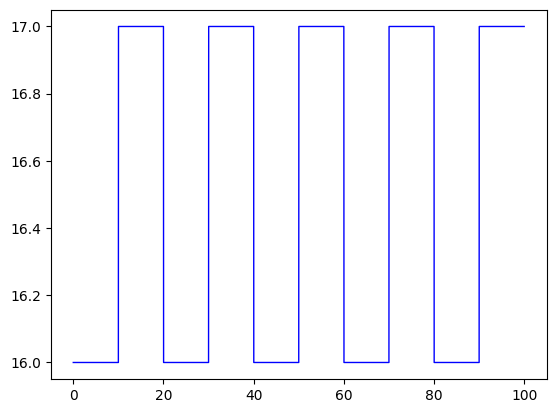

In [ ]:
plt.plot ( t, sigma_1, linewidth = 1, color = 'b' )

In [ ]:
E=[math.sqrt(pow(x1-x2,2)+pow(y1-y2,2)+pow(z1 - z2,2)) for x1,x2,y1,y2,z1,z2 in zip(x_1,x_2,y_1,y_2,z_1,z_2)]

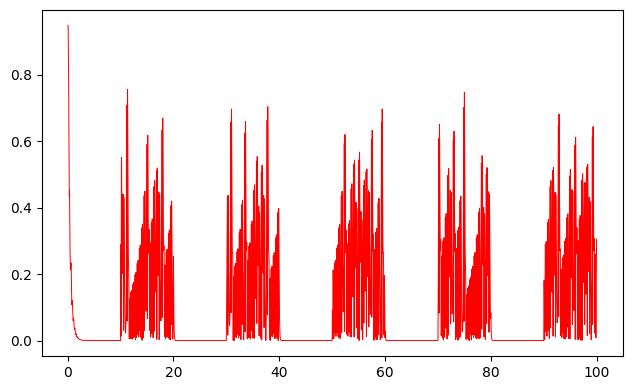

In [ ]:
plt.figure (figsize = (7.5,4.5))
plt.plot ( t[10:], E[10:], linewidth = 0.7, color = 'r' )

In [ ]:
#Restored Signal------------
M=[]
for i in E:
  if i> 0.001:
    M.append(1)
  else:
    M.append(0)

In [ ]:
#Majority Cleaning Algorithm
np.random.seed(0)
message_length = 100
restored_message = np.array(M)
noisy_message = restored_message.copy()
noise_indices = np.random.choice(message_length, size=10, replace=False)
noisy_message[noise_indices] = 1 - noisy_message[noise_indices]

def clean_binary_message_majority_voting(binary_message, window_size=5):
    cleaned_message = []

    for i in range(len(binary_message)):
        start = max(0, i - window_size // 2)
        end = min(len(binary_message), i + window_size // 2 + 1)
        window = binary_message[start:end]
        cleaned_bit = 1 if sum(window) > len(window) // 2 else 0
        cleaned_message.append(cleaned_bit)

    return cleaned_message


cleaned_message_majority_voting = clean_binary_message_majority_voting(noisy_message)

# Evaluate the accuracy of themethod by comparing with the restored message
accuracy_majority_voting = np.mean(cleaned_message_majority_voting == restored_message)
print(accuracy_majority_voting*100)


99.87


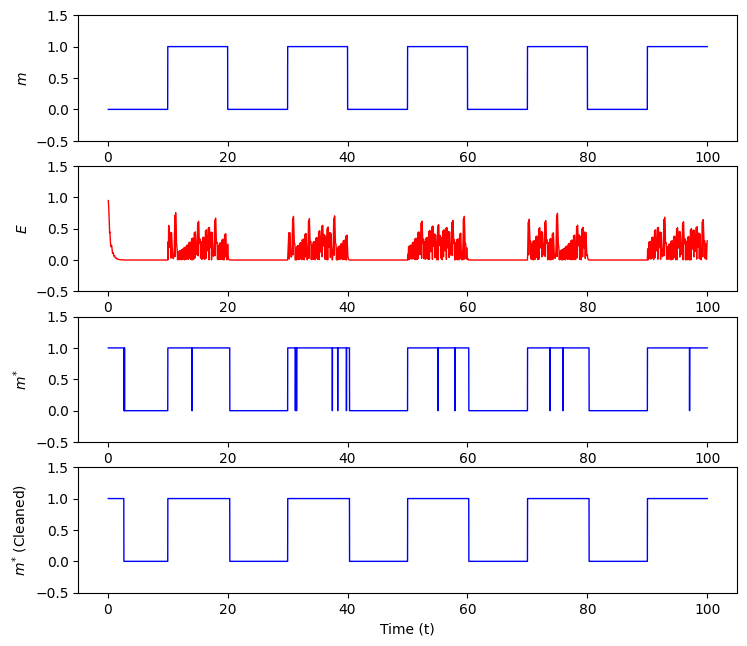

In [ ]:
# Plot for secure communictaion for digital signal
plt.figure (figsize = (8.5,7.5))
plt.subplot(4,1,1)
plt.plot ( t[10:], m[10:], linewidth = 1, color = 'b' )
plt.ylabel ( r'$m$')
plt.ylim(-0.5,1.5)

plt.subplot(4,1,2)
plt.plot ( t[10:], E[10:], linewidth = 1, color = 'r' )
plt.ylabel ( r'$E$')
plt.ylim(-0.5,1.5)

plt.subplot(4,1,3)
plt.plot ( t[10:], restored_message[10:], linewidth = 1, color = 'b' )
plt.ylabel ( r'$m^{*}$')
plt.ylim(-0.5,1.5)

plt.subplot(4,1,4)
plt.plot ( t[10:], cleaned_message_majority_voting[10:], linewidth = 1, color = 'b' )
plt.xlabel ( 'Time (t)' )
plt.ylabel ( r'$m^{*}$ (Cleaned)')
plt.ylim(-0.5,1.5)
plt.savefig('SC_CS-2.pdf', format='pdf')
plt.show ( )

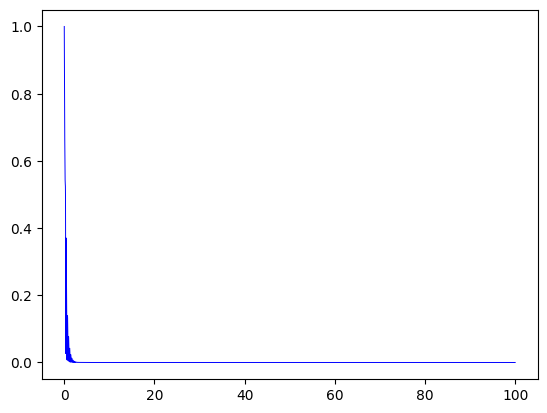

In [ ]:
plt.plot ( t, [math.sqrt(pow(z1-z2,2)) for z1,z2 in zip(z_1,z_2)], linewidth = 0.7, color = 'b' )